In [3]:
from qiskit import *
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import pyzx as zx
import numpy as np
pi = np.pi
import qiskit.qasm2



In [4]:
#generate pass manager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")

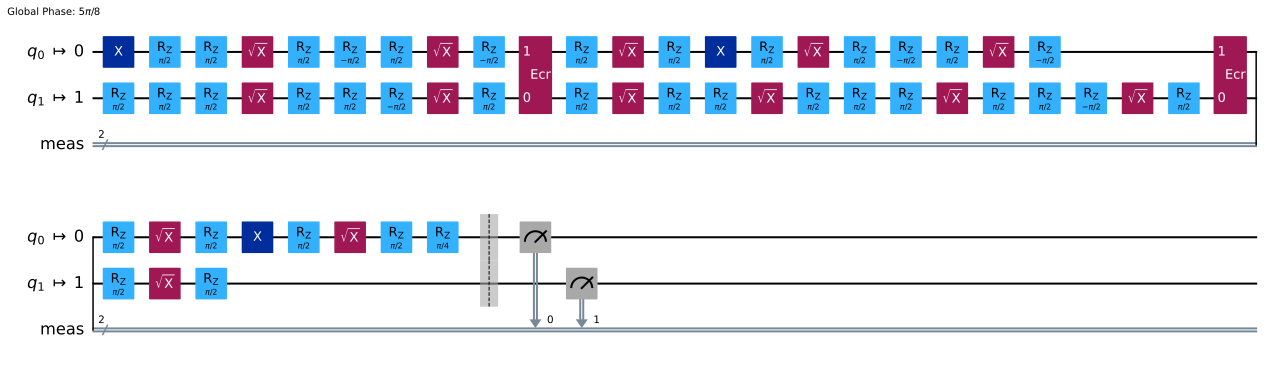

In [5]:
# Create a new circuit with two qubits
q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(q, c)
qc.x(q[0])
qc.s([q[1],q[0]])
qc.h(q[0])
qc.cx(q[0],q[1])
qc.h([q[0],q[1]])
qc.cx(q[0],q[1])
qc.h(q[0])
qc.t(q[0])

qc.measure_all()
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")


trans_o3 = transpile(qc, backend=backend, optimization_level=3)
trans_o3.draw("mpl", idle_wires=False)


trans_o2 = transpile(qc, backend=backend, optimization_level=2)
trans_o2.draw("mpl", idle_wires=False)


trans_o1 = transpile(qc, backend=backend, optimization_level=1)
trans_o1.draw("mpl", idle_wires=False)


trans_o0 = transpile(qc,backend=backend, optimization_level=0)
trans_o0.draw("mpl", idle_wires=False)



In [6]:
import qiskit.qasm2 as qasm
import pyzx as zx
import re
def replace_custom(trans):
    q1 = qasm.dumps(trans)
    i = q1.find("gate")
    j = q1.find("qreg")
    custom_gates = q1[i:j]
    qstr = q1[:i]+q1[j:] # remove the custom gate
    # print(custom_gates)

    gates = {}
    custom_gates = custom_gates.split("\n")
    # formatting and initializing the dictionary that will hold all the custom gates
    for gate in custom_gates:
        func = gate[gate.find("{"):]
        # make q0, q1 to q[0], q[1]
        func = re.sub("q", "q[", func)
        func = re.sub(r'(q\[\d)', r'\1]', func)
        if gate != "":
            gates[gate[5:8]] = func

    # print("dict:", gates)

    # replace all instances of custom gates in qstr with their respective expanded forms from dict
    for _ in range(0,len(gates)+1):
        
        for g in gates:
            if g in qstr:
                # get index of the entire line from qstr and then replace
                start_index = qstr.find(g)
                next_index = qstr.index(';', start_index)
                qstr = qstr.replace(qstr[start_index:next_index+1],gates[g][2:-1])
                qstr = qstr.replace("param0", "pi/4") # manually declared


    # print(qstr)
    circ1 = zx.qasm(qstr)
    # zx.draw(circ1)
    return circ1


In [7]:
q1 = replace_custom(trans_o1)
q0 = replace_custom(trans_o0)
q2 = replace_custom(trans_o2)
q3 = replace_custom(trans_o3)